# PERCEPTRON MODEL

* Class 0 (later -1): This subtype is characterized by 'feature 1' values uniformly distributed between 0 and 3, and 'feature 2' values also uniformly distributed between 0 and 3.

* Class 1: This subtype is characterized by 'feature 1' values uniformly distributed between 4 and 7, and 'feature 2' values also uniformly distributed between 4 and 7.

## 1) Implementation of Perceptron Algorithm

In [341]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [342]:
class Perceptron:
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    
    # make random initialization of vector of weights
    def inicialize_weights(self, x):        
        self.w_ = np.random.uniform(low = -0.5, high = 0.5, size = x.shape[1] + 1)
        self.errors_ = []
    
    # linear combination
    def input_net(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    # apply activation function to predict
    def predict(self, x):
        return np.where(self.input_net(x)>=0, 1, -1)

    # process of training
    def fit(self, x, y):
        self.inicialize_weights(x)
        # iterative process by epochs
        for _ in range(self.n_iter):
            error = 0    # accumulative error by iteration
            for xi, yi in zip(x, y):
                y_hat = self.predict(xi)
                delta_w = self.eta * (yi - y_hat)
                self.w_[0] += delta_w
                self.w_[1:] += delta_w * xi

                if delta_w != 0:
                    error += 1
            self.errors_.append(error)


    # function to make iterative process of test
    def test(self, x_test, y_test):
        n = x_test.shape[0]
        self.accuracy = 0 
        y_pred = list()
        
        for i in range(n):
            xi = x_test[i, :]
            yi = y_test[i]
            y_pred.append(self.predict(xi))

            # verify correct classification            
            if y_pred[i] == yi:
                self.accuracy = self.accuracy + 1
        
        # calculate accuracy
        self.accuracy = 100 * round(self.accuracy/n, 5)
        
        return y_pred

## 2) Preprocessing

In [343]:
# load dataset
dataset = pd.read_csv("datasets/linearly_separable_data.csv", header = 0)
dataset.head()

,feature 1,feature 2,class
0,4.960718,6.212893,1
1,1.242211,0.706613,0
2,4.537162,4.862999,1
3,5.659336,5.999297,1
4,4.694133,6.713496,1


In [344]:
dataset_y = dataset['class']
dataset_x = dataset.drop('class', axis=1)
# Calculating correlations
correlations = dataset_x.corrwith(dataset_y).abs()
print(correlations)

# Choosing the features with the highest correlation
significant_features = correlations[correlations > 0.75].index.tolist()
print(f"Selected features: {significant_features}")

feature 1    0.891996
feature 2    0.900890
dtype: float64
Selected features: ['feature 1', 'feature 2']


In [399]:
# split independent and dependent variables
x = dataset.loc[600:700, significant_features].values
y = dataset_y.loc[600:700].values

In [400]:
x[:5]

array([[ 3.93316197,  5.97995251],
       [-0.05117811,  2.91283991],
       [ 0.71669045,  1.76151849],
       [ 1.2781786 ,  2.09819986],
       [ 3.52313734,  2.61888863]])

In [401]:
y = np.where(y == 1, 1, -1)
y

array([ 1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1])

## 3) Training step

In [402]:
# training process
model = Perceptron(eta = 0.1, n_iter = 10)
model.fit(x, y)

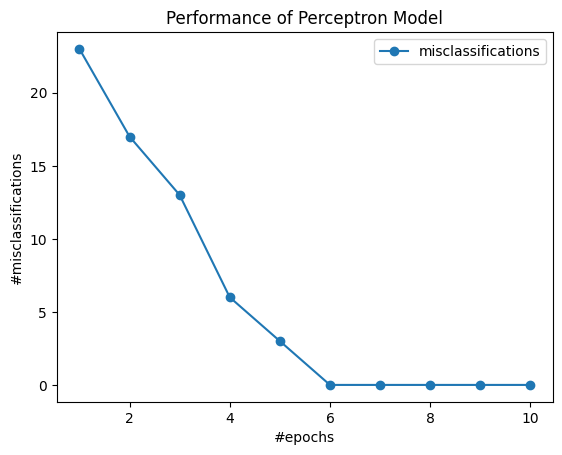

In [403]:
# plot results of training
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker = 'o', label = "misclassifications")
plt.title("Performance of Perceptron Model")
plt.xlabel("#epochs")
plt.ylabel("#misclassifications")
plt.legend(loc = "upper right")
plt.show()

In [404]:
from matplotlib.colors import ListedColormap

# plot the decision region of perceptron
def plot_decision_regions(x, y, classifier, resolution = 0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.5, cmap = cmap)                                        
    plt.xlim(xx1.min(), xx1.max())                                        
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, classe in enumerate(np.unique(y)):
        plt.scatter(x[y == classe, 0], x[y == classe, 1], alpha = 0.8, 
                    color = cmap(idx), marker = markers[idx], label = classe) 

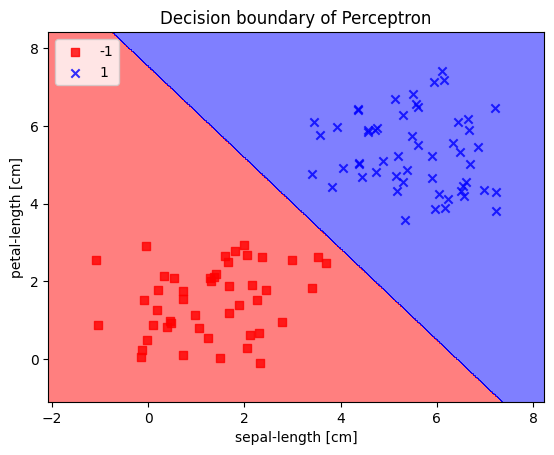

In [405]:
plot_decision_regions(x, y, model)
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.legend(loc = 'upper left')
plt.title('Decision boundary of Perceptron')
plt.show()

## 4) Explicit the model

In [406]:
model.w_

array([-4.98338961,  0.77623118,  0.66155308])

In [407]:
print("Percetron classifier model: ")
print(f"iris_specie = {model.w_[0]:.4f} + {model.w_[1]:.4f} * feature_1 + {model.w_[2]:.4f} * feature_2")

Percetron classifier model: 
iris_specie = -4.9834 + 0.7762 * feature_1 + 0.6616 * feature_2


In [408]:
new_point = np.array([5.0, 6.21312])
pred = model.predict(new_point)
print("class = ", pred)

class =  1


In [409]:
new_point2 = np.array([2.0, 0.212])
pred2 = model.predict(new_point2)
print("class = ", pred)

class =  1


In [410]:
x_t = dataset.loc[101:200, significant_features].values
y_t = dataset_y.loc[101:200].values

In [411]:
y_t = np.where(y == 1, 1, -1)

In [412]:
# make test
model.test(x_t, y_t)
print("Accuracy = ", model.accuracy, "%")

Accuracy =  45.0 %
